In [48]:
#Compare Algorithms
import numpy
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
import math
# fix random seed for reproducibility

import warnings
warnings.filterwarnings("ignore")
numpy.random.seed(7)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Importing HandPD Dataset

In [6]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Spiral_HandPD.csv to Spiral_HandPD (1).csv


In [7]:
import io
df_spiral = pd.read_csv(io.BytesIO(uploaded['Spiral_HandPD.csv']))

In [8]:
uploaded = files.upload()

Saving Meander_HandPD.csv to Meander_HandPD (1).csv


In [9]:
import io
df_Meander = pd.read_csv(io.BytesIO(uploaded['Meander_HandPD.csv']))

In [10]:
print(df_spiral.columns)
print(df_Meander.columns)
print(df_spiral.shape)
print(df_Meander.shape)

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ST_HT',
       'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')
(368, 16)
(368, 16)


In [11]:
Y_df_S = df_spiral.iloc[:,3]
Y_df_M = df_Meander.iloc[:,3]
print(Y_df_S)
Y_df_S = Y_df_S.replace(2, 0)
print(Y_df_S)

0      1
1      1
2      1
3      1
4      1
      ..
363    2
364    2
365    2
366    2
367    2
Name: CLASS_TYPE, Length: 368, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
363    0
364    0
365    0
366    0
367    0
Name: CLASS_TYPE, Length: 368, dtype: int64


In [12]:
#df_spiral = df_spiral.drop('_ID_EXAM', 1) 
X_df_S = df_spiral.iloc[:, 7:16]
X_df_M = df_Meander.iloc[:, 7:16]
print(X_df_S.columns)
print(X_df_M.columns)
print(X_df_S.shape)
print(X_df_M.shape)
print(Y_df_S.shape)
print(Y_df_M.shape)

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['RMS', 'MAX_BETWEEN_ST_HT', 'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')
(368, 9)
(368, 9)
(368,)
(368,)


In [13]:
X_S = numpy.array(X_df_S)
X_M = numpy.array(X_df_M)
Y_S = numpy.array(Y_df_S)
Y_M = numpy.array(Y_df_M)

print(X_S.shape)
print(X_M.shape)
print(Y_S.shape)
print(Y_M.shape)
print(Y_S)

(368, 9)
(368, 9)
(368,)
(368,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Importing NewHandPD Dataset

In [14]:
uploaded = files.upload()

Saving NewSpiral.csv to NewSpiral (1).csv


In [15]:
import io
df_spiral_new = pd.read_csv(io.BytesIO(uploaded['NewSpiral.csv']))

In [16]:
uploaded = files.upload()

Saving NewMeander.csv to NewMeander (1).csv


In [17]:
import io
df_Meander_new = pd.read_csv(io.BytesIO(uploaded['NewMeander.csv']))

In [18]:
print(df_spiral_new.columns)
print(df_Meander_new.columns)
print(df_spiral_new.shape)
print(df_Meander_new.shape)

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
(264, 16)
(264, 16)


In [19]:
Y_df_S_new = df_spiral_new.iloc[:,3]
Y_df_M_new = df_Meander_new.iloc[:,3]
print(Y_df_S_new)
Y_df_S_new = Y_df_S_new.replace(2, 0)
print(Y_df_S_new)

0      1
1      1
2      1
3      1
4      1
      ..
259    2
260    2
261    2
262    2
263    2
Name: CLASS_TYPE, Length: 264, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
259    0
260    0
261    0
262    0
263    0
Name: CLASS_TYPE, Length: 264, dtype: int64


In [20]:
#df_spiral = df_spiral.drop('_ID_EXAM', 1) 
X_df_S_new = df_spiral_new.iloc[:, 7:16]
X_df_M_new = df_Meander_new.iloc[:, 7:16]
print(X_df_S_new.columns)
print(X_df_M_new.columns)
print(X_df_S_new.shape)
print(X_df_M_new.shape)
print(Y_df_S_new.shape)
print(Y_df_M_new.shape)

Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
Index(['RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')
(264, 9)
(264, 9)
(264,)
(264,)


In [21]:
X_S_new = numpy.array(X_df_S_new)
X_M_new = numpy.array(X_df_M_new)
Y_S_new = numpy.array(Y_df_S_new)
Y_M_new = numpy.array(Y_df_M_new)

print(X_S_new.shape)
print(X_M_new.shape)
print(Y_S_new.shape)
print(Y_M_new.shape)
print(Y_S_new)

(264, 9)
(264, 9)
(264,)
(264,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


# F-SVM DSS

In [30]:
pip install sklearn-deap

     |████████████████████████████████| 163kB 11.1MB/s 


In [33]:
model_FS = SelectKBest(f_classif, k=7)
model_FS.fit(X_S_new,Y_S_new)
X_FS_new = model_FS.transform(X_S_new)
S1=model_FS.get_support()

In [36]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

paramgrid = {"kernel": ["rbf"],
             "C"     : np.logspace(-9, 9, num=25, base=10),
             "gamma" : np.logspace(-9, 9, num=25, base=10)}


from evolutionary_search import EvolutionaryAlgorithmSearchCV
cv = EvolutionaryAlgorithmSearchCV(estimator=SVC(random_state=7),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=KFold(n_splits=66),
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
cv.fit(X_FS_new, Y_S_new)

Types [1, 2, 2] and maxint [0, 24, 24] detected
--- Evolve in 625 possible combinations ---
gen	nevals	avg    	min     	max     	std      
0  	50    	0.60947	0.503788	0.734848	0.0703414
1  	30    	0.648106	0.526515	0.738636	0.067178 
2  	33    	0.682197	0.530303	0.738636	0.0532207
3  	34    	0.714621	0.636364	0.738636	0.0247996
4  	32    	0.724924	0.530303	0.738636	0.0321938
5  	27    	0.736667	0.69697 	0.738636	0.00597669
Best individual is: {'kernel': 'rbf', 'C': 1.0, 'gamma': 1.7782794100389227e-07}
with fitness: 0.7386363636363636


In [38]:
print("Done")

Done


In [37]:
model_FS = SelectKBest(f_classif, k=7)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_new[[range(lb,ub)]]
    Y_train = numpy.delete(Y_S_new, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    model=SVC(C=1, kernel = 'rbf', gamma=1.7782794100389227e-07, random_state = 7)
    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S[range(lb,ub)]
    Y_train = numpy.delete(Y_S, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    model=SVC(C=0.06, kernel = 'rbf', gamma=1e-07, random_state = 7)
    #model = GaussianNB()
    #model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_new) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("Features Size =", X_FS.shape)

[ True  True False False  True  True  True  True  True]
Size of Selected Features = (368, 7)
Size of Selected Features = (264, 7)
Main Database or Model Development Acc ================ 71.21212121212122
Sen ================= 90.32258064516128
Spec ================== 54.285714285714285
Indepdent Testing Acc ======================================== 47.82608695652174
Sen = 51.35135135135135
Spec = 33.33333333333333
Features Size = (368, 7)


# F-LR DSS

In [39]:
model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to treat it as blind test
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_new[[range(lb,ub)]]
    Y_train = numpy.delete(Y_S_new, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    model=LogisticRegression(C = 0.0001, random_state = 7)
    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S[range(lb,ub)]
    Y_train = numpy.delete(Y_S, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    model=LogisticRegression(C=0.0001, random_state = 7)
    #model = GaussianNB()
    #model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_new) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("Features Size =", X_FS.shape)

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 89.39393939393939
Sen ================= 77.41935483870968
Spec ================== 100.0
Indepdent Testing Acc ======================================== 19.565217391304348
Sen = 0.0
Spec = 100.0
Features Size = (368, 2)


# F-LDA DSS

In [40]:
model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to treat it as blind test
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_new[[range(lb,ub)]]
    Y_train = numpy.delete(Y_S_new, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S[range(lb,ub)]
    Y_train = numpy.delete(Y_S, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    #model = GaussianNB()
    model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_new) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("Features Size =", X_FS.shape)

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 69.6969696969697
Sen ================= 83.87096774193549
Spec ================== 57.14285714285714
Indepdent Testing Acc ======================================== 80.43478260869566
Sen = 100.0
Spec = 0.0
Features Size = (368, 2)


# F-GNB DSS

In [42]:
model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_new[[range(lb,ub)]]
    Y_train = numpy.delete(Y_S_new, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S[range(lb,ub)]
    Y_train = numpy.delete(Y_S, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    model = GaussianNB()
    #model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_new) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("Features Size =", X_FS.shape)

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 71.21212121212122
Sen ================= 96.7741935483871
Spec ================== 48.57142857142857
Indepdent Testing Acc ======================================== 63.04347826086956
Sen = 70.27027027027027
Spec = 33.33333333333333
Features Size = (368, 2)


# ROC Curves F-GNB Main Data i.e. Model Development Phase

In [44]:
#For ROC:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e. 
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_S_new.shape)
Y_S_New=Y_S_new[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_S_New.shape)
##################################

(264,)
(264, 1)


In [65]:
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_New[[range(lb,ub)]]                      # Here now need to use Y_S_New instead of Y_S_new
    Y_train = numpy.delete(Y_S_New, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 71.21212121212122
Sen ================= 96.7741935483871
Spec ================== 48.57142857142857
MCC = 0.5081516761362315


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


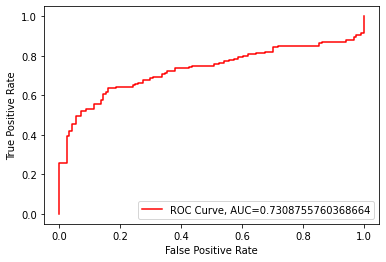

In [46]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_GNB_Main.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC for F-GNB based DSS during independent testing

In [47]:
#For ROC:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e. 
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_S.shape)
Y_S_Old=Y_S[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_S_Old.shape)
##################################

(368,)
(368, 1)


In [49]:
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S_Old[range(lb,ub)]
    Y_train = numpy.delete(Y_S_Old, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    model = GaussianNB()
    #model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_New) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

     ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("Features Size =", X_FS.shape)

Indepdent Testing Acc ======================================== 63.04347826086956
Sen = 70.27027027027027
Spec = 33.33333333333333
MCC = 0.031068488300060003
Features Size = (368, 2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


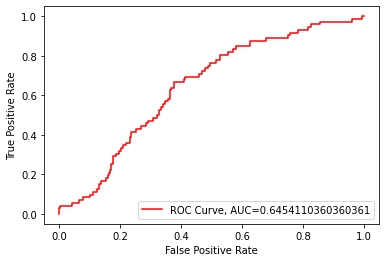

In [50]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_GNB_Ind.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC for F-LDA based DSS (Main Data or Model Development Phase)

In [51]:
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_New[[range(lb,ub)]]                      # Here now need to use Y_S_New instead of Y_S_new
    Y_train = numpy.delete(Y_S_New, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 69.6969696969697
Sen ================= 83.87096774193549
Spec ================== 57.14285714285714
MCC = 0.4219715869955449


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


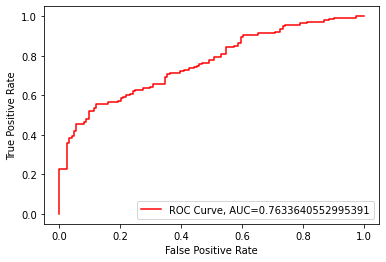

In [52]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_LDA_Main.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC F-LDA DSS for Independent Testing Phase

In [53]:
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S_Old[range(lb,ub)]
    Y_train = numpy.delete(Y_S_Old, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    #model = GaussianNB()
    model = LinearDiscriminantAnalysis()

    model.fit(X_FS_new, Y_S_New) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

     ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("Features Size =", X_FS.shape)

Indepdent Testing Acc ======================================== 80.43478260869566
Sen = 100.0
Spec = 0.0


ZeroDivisionError: ignored

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


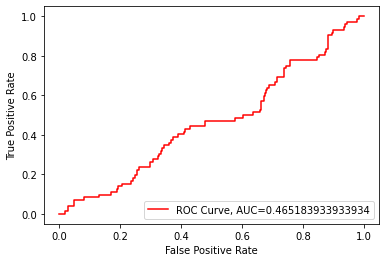

In [54]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_LDA_Ind.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC F-LR DSS (Main Data or Model Development Phase)

In [55]:
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

model_FS = SelectKBest(f_classif, k=2)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_New[[range(lb,ub)]]                      # Here now need to use Y_S_New instead of Y_S_new
    Y_train = numpy.delete(Y_S_New, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()
    model=LogisticRegression(C = 0.0001, random_state = 7)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

[ True False False False False False False  True False]
Size of Selected Features = (368, 2)
Size of Selected Features = (264, 2)
Main Database or Model Development Acc ================ 89.39393939393939
Sen ================= 77.41935483870968
Spec ================== 100.0
MCC = 0.8032193289024988


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


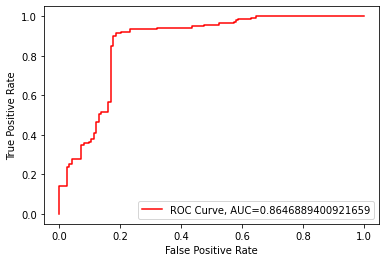

In [56]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_LR_Main.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC F-LR DSS for Independent Testing Phase

In [57]:
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S_Old[range(lb,ub)]
    Y_train = numpy.delete(Y_S_Old, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    #model = GaussianNB()
    #model = LinearDiscriminantAnalysis()
    model=LogisticRegression(C = 0.0001, random_state = 7)

    model.fit(X_FS_new, Y_S_New) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

     ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("Features Size =", X_FS.shape)

Indepdent Testing Acc ======================================== 19.565217391304348
Sen = 0.0
Spec = 100.0


ZeroDivisionError: ignored

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


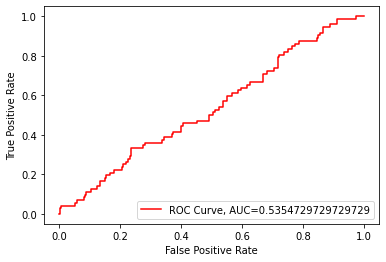

In [58]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_LR_Ind.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC F-SVM DSS (Main Data i.e. Model Development Phase)

In [61]:
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

model_FS = SelectKBest(f_classif, k=7)
model_FS.fit(X_S_new,Y_S_new)
X_FS = model_FS.transform(X_S)
X_FS_new = model_FS.transform(X_S_new)   # For feature selection from indepdendent testing dataset, we will use fit model on the main dataset, in order to tr
S1=model_FS.get_support()
print(S1)
print("Size of Selected Features =", X_FS.shape)
print("Size of Selected Features =", X_FS_new.shape)
        
############################################## LOSO CV on Main Dataset i.e. NewHandPD#################################
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=66:

    Y_test = Y_S_New[[range(lb,ub)]]                      # Here now need to use Y_S_New instead of Y_S_new
    Y_train = numpy.delete(Y_S_New, range(lb,ub), 0)

    X_test = X_FS_new[[range(lb,ub)]]
    X_train = numpy.delete(X_FS_new, range(lb,ub), 0)

    #model = GaussianNB()
    #model=SVC(C=c, kernel = 'rbf', gamma = g, random_state = 7)
    #model = LinearDiscriminantAnalysis()
    #model=LogisticRegression(C = 0.0001, random_state = 7)
    model=SVC(C=1, kernel = 'rbf', gamma=1.7782794100389227e-07, probability=True, random_state = 7)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=35:
            TN=TN+1
        if j>35:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
FP=35-TN
FN=31-TP
Sen=(TP/31)*100
Spec=(TN/35)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Main Database or Model Development Acc ================", Best_Acc)
    print("Sen =================", Sen)
    print("Spec ==================", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

[ True  True False False  True  True  True  True  True]
Size of Selected Features = (368, 7)
Size of Selected Features = (264, 7)
Main Database or Model Development Acc ================ 71.21212121212122
Sen ================= 90.32258064516128
Spec ================== 54.285714285714285
MCC = 0.47227266981520105


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


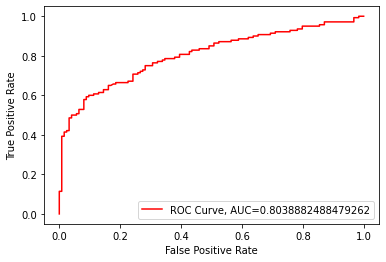

In [62]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_SVM_Main.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')

# ROC for F-SVM DSS (Independent Testing Phase)

In [63]:
############################################ LOSO CV on Independent Testing Dataset i.e. HandPD #######################
import numpy
# The Below are to create empty arrays for ROC Chart 
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)
Best_Acc=0
TP=0
TN=0
FP=0
FN=0

j=1
lb=0
ub=4
Net_Acc=0
while j<=92:

    Y_test = Y_S_Old[range(lb,ub)]
    Y_train = numpy.delete(Y_S_Old, range(lb,ub), 0)

    X_test = X_FS[range(lb,ub)]
    X_train = numpy.delete(X_FS, range(lb,ub), 0)

    #model = GaussianNB()
    #model = LinearDiscriminantAnalysis()
    #model=LogisticRegression(C = 0.0001, random_state = 7)
    model=SVC(C=1, kernel = 'rbf', gamma=1.7782794100389227e-07, probability=True, random_state = 7)

    model.fit(X_FS_new, Y_S_New) # Train the model using main dataset i.e. NewHandPD with selected features.
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

     ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
        Net_Acc = Net_Acc+1
        if j<=18:
            TN=TN+1
        if j>18:
            TP=TP+1
    lb = lb+4
    ub = ub+4
    j=j+1
FP=18-TN
FN=74-TP
LOSO_Acc = (Net_Acc*100)/92
Sen = (TP/74)*100
Spec = (TN/18)*100
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Indepdent Testing Acc ========================================", Best_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("Features Size =", X_FS.shape)

Indepdent Testing Acc ======================================== 70.65217391304348
Sen = 87.83783783783784
Spec = 0.0
MCC = -0.16240619866164335
Features Size = (368, 7)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


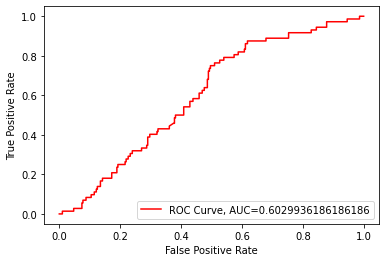

In [64]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ROC_SVM_Ind.eps', format='eps', dpi=1200)
plt.show()
#plt.savefig('ROC_LOSO_Main_CollectedData.eps', format='eps')